# Import necessities

In [1]:
import json
import pandas as pd
from matplotlib import pyplot as plt

# Loading

In [2]:
# Only temporary before we set up the DB in the cloud
incidents=[]
with open("../data/raw/temp1.json","r") as json_file:
  incidents+=json.load(json_file)['incidents']

In [3]:
icons_dict={0: "Unknown",1: "Accident",2: "Fog",3: "Dangerous Conditions",4: "Rain",5: "Ice",6: "Jam",7: "Lane Closed",8: "Road Closed",9: "Road Works",10: "Wind",11: "Flooding", 14: "Broken Down Vehicle"}
#incidents=data["incidents"]
custom_inc=[]
for inc in incidents:
  properties=inc["properties"]
  custom_inc.append({ "category":icons_dict[properties["iconCategory"]],"coordinates":inc["geometry"]["coordinates"][0], "startTime":properties["startTime"], "endTime":properties["endTime"], "from":properties["from"],"to":properties["to"], "type" : inc["type"]})
df=pd.DataFrame(custom_inc)

TypeError: list indices must be integers or slices, not str

In [5]:
len(incidents)

1011

# Cleaning

In [6]:
df.head()

,category,coordinates,startTime,endTime,from,to,type
0,Road Closed,"[-74.2529065009, 40.8846880864]",2023-12-19T16:14:34Z,None,State Route 23,US Highway 46,Feature
1,Road Closed,"[-74.2627394791, 40.886544155]",2023-12-19T16:14:34Z,None,US Highway 46,State Route 23,Feature
2,Jam,"[-74.2490159567, 40.6607718819]",2024-03-16T20:42:15Z,2024-03-16T21:03:20Z,E 2nd Ave,E 1st Ave,Feature
3,Jam,"[-74.2489113506, 40.8900578692]",2024-03-16T20:29:42Z,2024-03-16T21:03:20Z,US-46 (NJ-23),Main St (Newark Pompton Tpke/NJ-23),Feature
4,Jam,"[-74.2437185939, 40.7272705583]",2024-03-16T19:54:12Z,2024-03-16T21:04:20Z,Tiffany Pl,Clinton Ave,Feature


## Convert timecolumns to timestamps

In [13]:
type(df["startTime"][0])

str

In [14]:
df['startTime'] = pd.to_datetime(df['startTime'])
df['endTime'] = pd.to_datetime(df['endTime'])

print(type(df["startTime"][0]), type(df["endTime"][0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'> <class 'pandas._libs.tslibs.nattype.NaTType'>


## Convert coordinates to tuples

In [15]:
df["coordinates"]=df["coordinates"].apply(tuple)
print(type(df["coordinates"][0]))

<class 'tuple'>


## Duplicates

In [16]:
df.duplicated().sum()

0

In [17]:
df.drop_duplicates(inplace = True)

In [18]:
df.count()

category       1011
coordinates    1011
startTime      1011
endTime         854
from           1011
to             1011
type           1011
dtype: int64

## Reset index

In [19]:
df.reset_index(inplace=True, drop =True)

# Exploration

In [20]:
df.tail()

,category,coordinates,startTime,endTime,from,to,type
1006,Jam,"(-73.7165237064, 40.735584053)",2024-03-16 20:30:56+00:00,2024-03-16 21:03:20+00:00,Hillside Ave,85th Ave,Feature
1007,Jam,"(-73.7229636902, 40.7540926589)",2024-03-16 17:15:52+00:00,2024-03-16 21:03:20+00:00,Little Neck Pkwy/Exit 24 (Grand Central Pkwy),Northern State Pkwy (Grand Central Pkwy),Feature
1008,Jam,"(-73.7128919954, 40.7597132044)",2024-03-16 20:21:38+00:00,2024-03-16 21:04:20+00:00,Grand Central Pkwy (Northern State Pkwy),Willis Ave/Exit 28 (Northern State Pkwy),Feature
1009,Jam,"(-73.6397387678, 40.7810931434)",2024-03-16 19:44:04+00:00,2024-03-16 23:35:20+00:00,I-495/Exit 29 (Northern State Pkwy),Grand Central Pkwy (Northern State Pkwy),Feature
1010,Jam,"(-73.6172216231, 40.7836961961)",2024-03-16 19:34:28+00:00,2024-03-16 22:55:20+00:00,NY-25/Exit 40 (I-495),Oceania St/Exit 28 (I-495),Feature


In [21]:
df.groupby("category").count()

,coordinates,startTime,endTime,from,to,type
category,,,,,,
Accident,1,1,0,1,1,1
Jam,749,749,749,749,749,749
Lane Closed,7,7,6,7,7,7
Road Closed,172,172,51,172,172,172
Road Works,36,36,3,36,36,36
Unknown,46,46,45,46,46,46


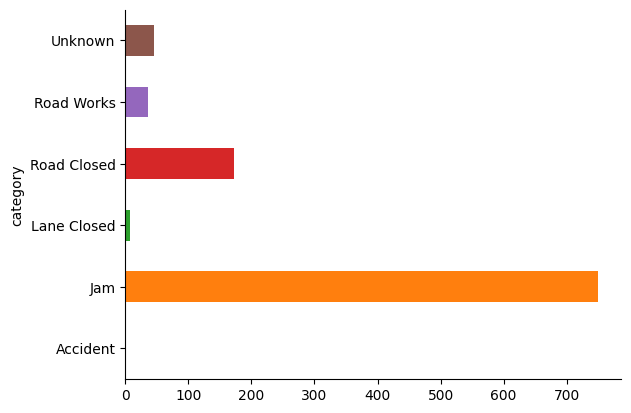

In [22]:
df.groupby('category').size().plot(kind='barh', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.gca().spines[['top', 'right',]].set_visible(False)

In [23]:
def rows_after(certain_time_str='2024-03-01 00:00:00'):
  certain_time = pd.Timestamp(certain_time_str, tz='UTC')
  filtered_df = df[df['startTime'] > certain_time]
  return filtered_df["type"].count()

In [24]:
rows_after('2024-03-15 00:00:00' )

856

In [25]:
df.sort_values(by="startTime", ascending=False).head(20)

,category,coordinates,startTime,endTime,from,to,type
226,Jam,"(-74.0100351567, 40.7051436688)",2024-03-16 20:43:20+00:00,2024-03-16 21:03:20+00:00,S William St,Wall St,Feature
60,Jam,"(-74.1776235993, 40.6945020223)",2024-03-16 20:43:20+00:00,2024-03-16 21:03:20+00:00,Express Rd,Tower Rd,Feature
37,Jam,"(-74.2153716679, 40.6676330145)",2024-03-16 20:43:20+00:00,2024-03-16 21:03:20+00:00,NJ-27/Westfield Ave (S Broad St),Rahway Ave/Elizabeth Ave (Broad St),Feature
231,Jam,"(-74.0101263518, 40.7143946218)",2024-03-16 20:43:20+00:00,2024-03-16 21:03:20+00:00,Chambers St / Hudson St,Broadway,Feature
617,Jam,"(-73.9251405592, 40.8476936876)",2024-03-16 20:43:20+00:00,2024-03-16 21:09:20+00:00,Cross Bronx Expwy (I-95) exit [7N-S],G Washington Br exit [7S],Feature
206,Jam,"(-74.0221319194, 40.6307472337)",2024-03-16 20:43:20+00:00,2024-03-16 21:03:20+00:00,Bay Ridge Pkwy,Gowanus Expy E,Feature
619,Jam,"(-73.9285523291, 40.7278070466)",2024-03-16 20:43:20+00:00,2024-03-16 20:57:20+00:00,Long Is Expwy (I-495) exit [35A-B],Long Is Expwy (I-495) exit [35A-B],Feature
232,Jam,"(-74.011719584, 40.8444174079)",2024-03-16 20:43:20+00:00,2024-03-16 21:03:20+00:00,I-95/New Jersey Tpke (US-46),Grand Ave (US-46),Feature
137,Jam,"(-74.0772607024, 40.7108004996)",2024-03-16 20:43:20+00:00,2024-03-16 21:03:20+00:00,Kearney Ave / Hart St,Martin Luther King Jr Dr,Feature
829,Jam,"(-73.8557464475, 40.8337556173)",2024-03-16 20:43:20+00:00,2024-03-16 21:03:20+00:00,I-95/Cross Bronx Expy (Westchester Ave),Castle Hill Ave (Westchester Ave),Feature


In [26]:
a=rows_after('2024-01-01 00:00:00')
b=rows_after('2023-01-01 00:00:00')-a
c=rows_after('2022-01-01 00:00:00')-b-a

print(f'{a} incidents occured in 2024')
print(f'{b} incidents occured in 2023')
print(f'{c} incidents occured in 2022')

938 incidents occured in 2024
52 incidents occured in 2023
21 incidents occured in 2022


In [27]:
#make a new feature called hours to

In [27]:
df.groupby('from').count().sort_values(by="category", ascending=False)['category'].head(10)

from
Park Ave                12
5th Ave                  8
Queens                   7
Lexington Ave            6
9th Ave                  5
Broadway                 5
Brooklyn Queens Expy     5
Main St                  4
7th Ave                  4
Degraw St                4
Name: category, dtype: int64

# Save df

In [29]:
df.to_csv('../data/processed/output.csv', index=False)